In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Reading the data

data = pd.read_csv('FuelConsumption.csv')
data.head(-3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271


In [39]:
# Data exploration 
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [40]:
# Select some features to explore more 

df = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019587244700>,
      dtype=object)

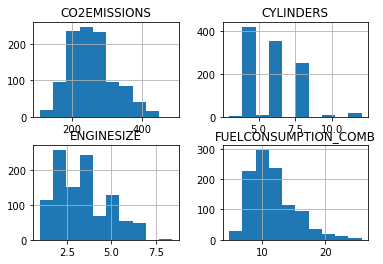

In [41]:
# Plot each of these features
df.hist()

Text(0, 0.5, 'CO2EMISSIONS')

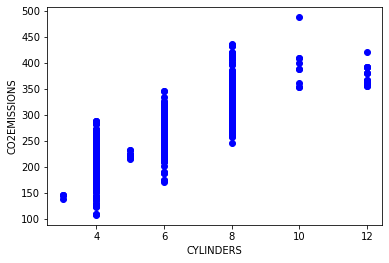

In [42]:
# plot each of these features vs the Emission, to see how linear is their relation 
plt.scatter(df.CYLINDERS ,df.CO2EMISSIONS , color ='Blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')

Text(0, 0.5, 'CO2EMISSIONS')

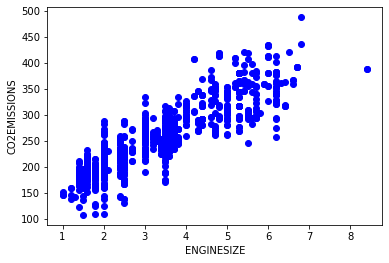

In [43]:
plt.scatter(df.ENGINESIZE ,df.CO2EMISSIONS , color ='Blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [44]:
# Creating train/test split  
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape)
print(y.shape)

(1067,)
(1067,)


# Simple Regression model

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = np.asanyarray(df[['ENGINESIZE']])
y_train = np.asanyarray(df[['CO2EMISSIONS']])
regr.fit (X_train, y_train)
print(X_train.shape)

(1067, 1)


In [46]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.12519979]]
Intercept:  [125.3040995]


Text(0, 0.5, 'Emission')

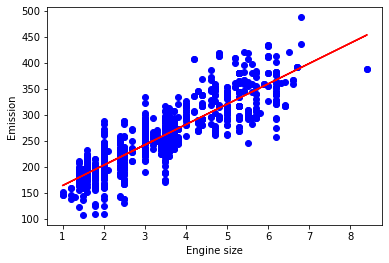

In [47]:
# Plot outputs
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [48]:
# Evaluation 
from sklearn.metrics import*

In [49]:
X_test = np.asanyarray(df[['ENGINESIZE']])
y_test = np.asanyarray(df[["CO2EMISSIONS"]])
y_test = regr.predict(X_test)
print('MSE:', mean_squared_error(y_train , y_test))
print('MAE:', mean_absolute_error(y_train, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_train , y_test)))
print('R²:', r2_score(y_train , y_test) )

MSE: 946.3140527188749
MAE: 23.346887834400427
RMSE: 30.762217942126263
R²: 0.7641458597854816


# Multiple linear Regression 

In [50]:
from sklearn import linear_model
reg_M = linear_model.LinearRegression()
x = np.asanyarray(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(df[["CO2EMISSIONS"]])
reg_M.fit(x,y)

LinearRegression()

In [51]:
print ('Coefficients: ', reg_M.coef_)
print ('Intercept: ',reg_M.intercept_)

Coefficients:  [[10.85524041  7.51622501  9.59563161]]
Intercept:  [65.22328417]


In [53]:
X_test = np.asanyarray(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(df[["CO2EMISSIONS"]])
y_hat  = reg_M.predict(X_test)

In [55]:
print('MSE:', mean_squared_error(y_hat , y_test))
print('MAE:', mean_absolute_error(y_hat, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_hat , y_test)))
print('R²:', r2_score(y_hat , y_test) )

MSE: 545.6836368455175
MAE: 16.915298097739353
RMSE: 23.359872363639266
R²: 0.8425882979232705
